In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
import pdb
import json
from math import sqrt

In [2]:
file_csv = '/mnt/disk15tb/paula/Main_DA_Projects/data_analysis_output/Primary Neurons/CDKL5_R59X_t1_nay292025/Network_outputs/Compiled_Networks.csv'

data_df = pd.read_csv(file_csv)

In [3]:
df = data_df.replace(np.NaN,0.0)
df

,Run_ID,DIV,Assay,Well,NeuronType,Time,Chip_ID,mean_IBI,cov_IBI,mean_Burst_Peak,...,MeanOutsideBurstISI,CoVOutsideBurstISI,Fanofactor,BurstRate,Baseline,IBI_List,Burst_Peak_List,Abs_Burst_Peak_List,Burst_Times_List,SpikesPerBurst_List
0,180,21,Network Today,2,KI,01-Nov-2024 14:52:41,M05506,0.000000,0.000000,0.000000,...,0.000000,0.000000,833.817020,0.000000,1.170369,0.0,0.0,0.0,0.0,0.0
1,180,21,Network Today,3,HET,01-Nov-2024 14:52:41,M05506,0.000000,0.000000,0.000000,...,0.000000,0.000000,672.730771,0.000000,2.434734,0.0,0.0,0.0,0.0,0.0
2,180,21,Network Today,4,WT,01-Nov-2024 14:52:41,M05506,0.000000,0.000000,2.788924,...,0.112816,169.807977,483.235137,0.003333,1.461934,0.0,2.7889,2855.8582,7,16483
3,177,21,Network Today,1,WT,01-Nov-2024 13:46:00,M07305,0.000000,0.000000,0.000000,...,0.000000,0.000000,495.626863,0.000000,2.296892,0.0,0.0,0.0,0.0,0.0
4,177,21,Network Today,2,KI,01-Nov-2024 13:46:00,M07305,55.500000,59.881115,3.160005,...,0.105360,157.735516,902.503471,0.010000,1.277870,"79,32","3.3788,3.4971,2.6042","3459.8641,3581.0006,2666.6711","5,7,8","18344,18692,21494"
5,177,21,Network Today,4,WT,01-Nov-2024 13:46:00,M07305,0.000000,0.000000,0.000000,...,0.000000,0.000000,679.449309,0.000000,1.495591,0.0,0.0,0.0,0.0,0.0
6,177,21,Network Today,5,KI,01-Nov-2024 13:46:00,M07305,0.000000,0.000000,5.203856,...,0.091261,165.782709,805.165355,0.003333,1.357539,0.0,5.2039,5328.7485,10,48608
7,177,21,Network Today,6,HET,01-Nov-2024 13:46:00,M07305,114.000000,21.089150,8.814654,...,0.082731,177.632655,691.953766,0.010000,2.046094,97131,"7.4364,8.6091,10.3985","7614.8382,8815.7039,10648.0765","0,6,7","0,54050,73781"
8,174,21,Network Today,1,WT,01-Nov-2024 12:09:23,M07427,0.000000,0.000000,0.000000,...,0.000000,0.000000,592.053540,0.000000,1.676557,0.0,0.0,0.0,0.0,0.0
9,174,21,Network Today,2,KI,01-Nov-2024 12:09:23,M07427,67.000000,71.807437,3.808885,...,0.099363,162.961123,864.590474,0.016667,1.574570,"83,19,127,39","3.8217,4.709,3.8552,3.3912,3.2673","3913.4371,4822.0633,3947.6822,3472.5682,3345.7398","6,5,4,0,0","26367,26786,20453,0,0"


In [4]:
div = df['DIV'].unique()
print(div)

# def extract_min_value(div):
#     return int(div.split('-')[0])

# df['DIV_sort'] = df['DIV'].apply(extract_min_value)
# df = df.sort_values(by=['DIV_sort']).reset_index(drop=True)
# df = df.drop(columns=['DIV_sort'])
# div = df['DIV'].unique()
# print(div)

[ 5  8 13 16 20 23 27 30]


In [5]:
chip_id = df['Chip_ID'].unique()
print(chip_id)

['M07039' 'M07420' 'M07427' 'M08018']


In [4]:
df['NeuronType'] = df['NeuronType'].str.strip()
unique_genotypes = df['NeuronType'].unique()
#unique_genotypes =['WT cortex','HET cortex']
print(unique_genotypes)

['KI' 'HET' 'WT' 'MxHEMI' 'MxWT' 'FxHET']


In [6]:
from scipy.stats import ttest_ind, sem, f_oneway
import pandas as pd
import itertools

def analyze_column_by_neurontype(activitydf, column_name, comparisons=None):
    """
    Analyze a specified column by NeuronType:
    - Compute descriptive statistics
    - Perform one-way ANOVA
    - Conduct pairwise Welch's t-tests for specified comparisons (returning t and p-values)
    - Return degrees of freedom for ANOVA

    Parameters:
    activitydf (pd.DataFrame): Data with 'NeuronType' and a numeric column.
    column_name (str): Name of the column to analyze.
    comparisons (list of tuples): Specific pairs of NeuronTypes to compare (e.g., [('KI', 'MxHEMI'), ('FxHET', 'HET')]).

    Returns:
    pd.DataFrame: Descriptive stats (mean, SEM) for each NeuronType.
    float: F-statistic from ANOVA.
    float: ANOVA p-value.
    int: Degrees of freedom between groups.
    int: Degrees of freedom within groups.
    list: Pairwise Welch's t-test results as (group1, group2, t-value, p-value).
    """

    # Descriptive statistics
    statistics = (
        activitydf.groupby("NeuronType")[column_name]
        .agg(['mean', sem])
        .reset_index()
    )
    statistics.columns = ["Group", f"mean_{column_name}", f"SEM_{column_name}"]

    print(f"\nDescriptive Statistics for {column_name} (Mean ± SEM):")
    for _, row in statistics.iterrows():
        print(f"{row['Group']}: {row[f'mean_{column_name}']:.2f} ± {row[f'SEM_{column_name}']:.2f}")

    # Prepare data for ANOVA
    groups = statistics["Group"].tolist()
    data_by_group = [activitydf[activitydf["NeuronType"] == group][column_name].dropna() for group in groups]

    # Calculate degrees of freedom
    k = len(groups)
    N_total = sum(len(group_data) for group_data in data_by_group)
    df_between = k - 1
    df_within = N_total - k

    # One-way ANOVA
    anova_stat, anova_p = f_oneway(*data_by_group)
    print(f"\nOne-way ANOVA:")
    print(f"F({df_between}, {df_within}) = {anova_stat:.4f}, p = {anova_p:.4g}")

    # Pairwise Welch's t-tests for specified comparisons
    print(f"\nPairwise Welch’s t-tests for {column_name}:")
    ttest_results = []
    if comparisons:
        for group1, group2 in comparisons:
            data1 = activitydf[activitydf["NeuronType"] == group1][column_name].dropna()
            data2 = activitydf[activitydf["NeuronType"] == group2][column_name].dropna()
            t_val, p_val = ttest_ind(data1, data2, equal_var=False)
            ttest_results.append((group1, group2, t_val, p_val))
            print(f"{group1} vs {group2}: t = {t_val:.4f}, p = {p_val:.4g}")
    else:
        print("No specific comparisons provided.")

    return statistics, anova_stat, anova_p, df_between, df_within, ttest_results

# Example usage:
column_name = "Number_Bursts"  # Replace with the column you want to analyze
comparisons = [('KI', 'MxHEMI'), ('FxHET', 'HET')]  # Specify the pairs to compare
stats_df, f_val, p_val, df_btw, df_within, pairwise_tests = analyze_column_by_neurontype(df, column_name, comparisons)


Descriptive Statistics for Number_Bursts (Mean ± SEM):
FxHET: 3.78 ± 0.98
HET: 1.00 ± 0.45
KI: 3.73 ± 0.69
MxHEMI: 4.00 ± 1.22
MxWT: 1.45 ± 0.34
WT: 0.64 ± 0.28

One-way ANOVA:
F(5, 50) = 6.0566, p = 0.0001859

Pairwise Welch’s t-tests for Number_Bursts:
KI vs MxHEMI: t = -0.1941, p = 0.8537
FxHET vs HET: t = 2.5724, p = 0.02557


## Without outlier removal

In [7]:
df.columns

Index(['Run_ID', 'DIV', 'Assay', 'Well', 'NeuronType', 'Time', 'Chip_ID',
       'mean_IBI', 'cov_IBI', 'mean_Burst_Peak', 'cov_Burst_Peak',
       'Number_Bursts', 'mean_Spike_per_Burst', 'cov_Spike_per_Burst',
       'mean_Burst_Peak_Abs', 'cov_Burst_Peak_Abs', 'mean_BurstDuration',
       'cov_BurstDuration', 'MeanNetworkISI', 'CoVNetworkISI',
       'MeanWithinBurstISI', 'CoVWithinBurstISI', 'MeanOutsideBurstISI',
       'CoVOutsideBurstISI', 'Fanofactor', 'BurstRate', 'Baseline', 'IBI_List',
       'Burst_Peak_List', 'Abs_Burst_Peak_List', 'Burst_Times_List',
       'SpikesPerBurst_List'],
      dtype='object')

In [8]:
colors = ['blue','orange','red']
markers = ['o','o','d','*','^']

Number of unique Genotypes: 3
['MxWT', 'FxHET', 'MxHEMI']
Number of unique Genotypes: 3
['MxWT', 'FxHET', 'MxHEMI']
Number of unique Genotypes: 3
['MxWT', 'FxHET', 'MxHEMI']
Number of unique Genotypes: 3
['MxWT', 'FxHET', 'MxHEMI']
Number of unique Genotypes: 3
['MxWT', 'FxHET', 'MxHEMI']


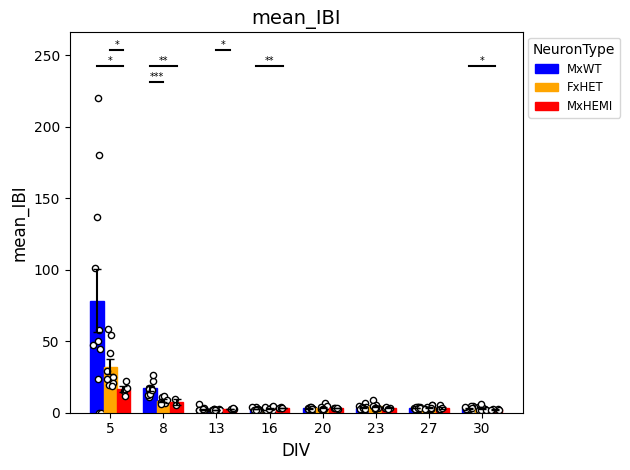

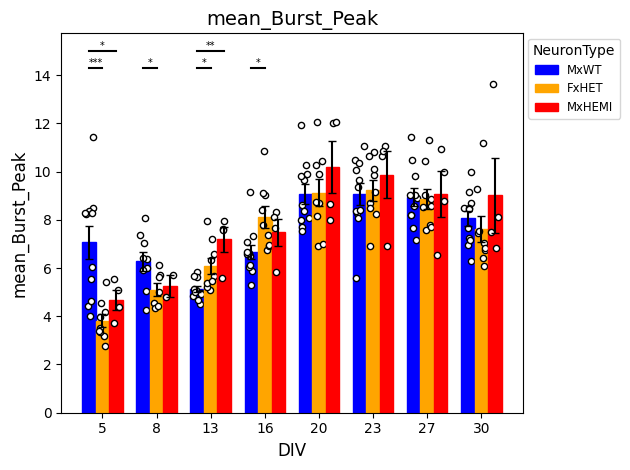

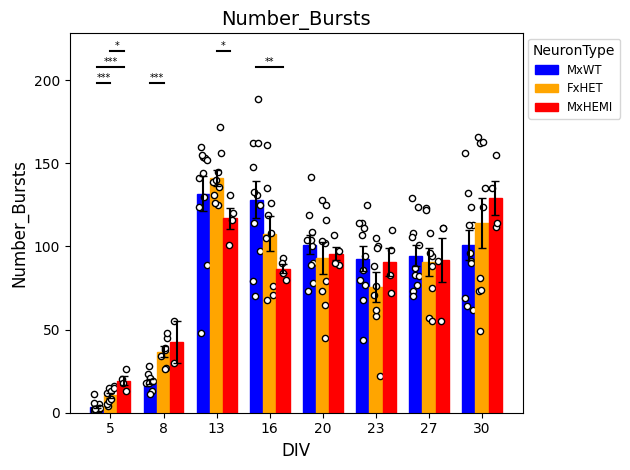

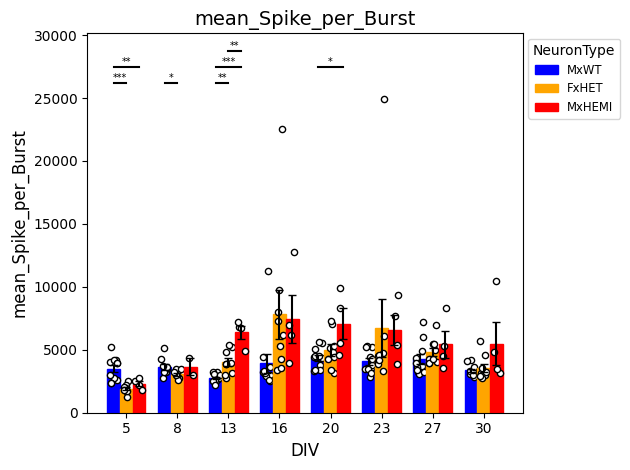

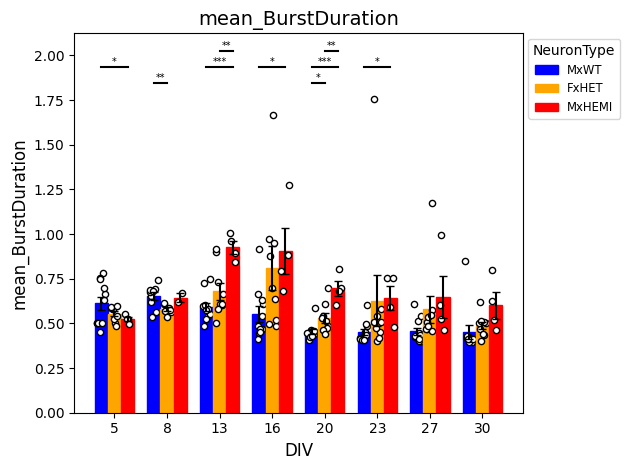

In [9]:
output_types = ['mean_IBI'
    , 'mean_Burst_Peak',  'Number_Bursts',
       'mean_Spike_per_Burst',
     'mean_BurstDuration']



unique_genotypes = [ 'MxWT', 'FxHET' ,'MxHEMI']

dirpath = '/mnt/disk15tb/paula/Main_DA_Projects/data_analysis_output/Primary Neurons/CDKL5_E6T1_Apr29/plots/'
for output_type in output_types:
    total_genotypes = len(unique_genotypes)
    #output_type='Number_Bursts'
    # Print the number of unique genotypes
    print(f"Number of unique Genotypes: {total_genotypes}")

    # Initialize output arrays for each unique genotype
    output_arrays = {genotype: [] for genotype in unique_genotypes}
    chip_arrays = {genotype: [] for genotype in unique_genotypes}
    well_arrays = {genotype: [] for genotype in unique_genotypes}
    print(unique_genotypes)
    # Fill data from data frame
    for i in div:
        for genotype in unique_genotypes:
            temp_df = df.loc[(df['DIV'] == i) &
                            (df['NeuronType'].str.strip() == genotype)
                            ]
            output_arrays[genotype].append(np.array(temp_df[output_type]))
            chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
            well_arrays[genotype].append(np.array(temp_df['Well']))
    #print(df)
    # Adjust bar width and gap between them
    bar_width = 0.25  # Adjust as necessary for your specific plot
    gap_between_bars = 0  # Adjust the gap between bars within a group

    # Calculate the total width for all bars in a group
    total_bar_group_width = total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars

    # Create x-coordinates of bars for each genotype group
    x_genotype = {genotype: [] for genotype in unique_genotypes}
    base_x_coordinate = np.arange(len(div))  # Base x-coordinates for each group
    offset = (total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars) / 2
    centered_x = base_x_coordinate - offset + bar_width / 2
    for i, genotype in enumerate(unique_genotypes):
        x_genotype[genotype] = centered_x + i * (bar_width + gap_between_bars)



    # Initialize plot
    fig, ax = plt.subplots()
    # Generate a list of distinct colors based on the number of genotypes
    #colors = [plt.colormaps['Set1'](i) for i in np.linspace(0, 1, len(unique_genotypes))]# Using a colormap to generate colors
    #colors2 = [plt.colormaps['Set2'](i) for i in np.linspace(0, 1, len(unique_genotypes))]#
    # marker_shapes = ['^', 's', 'v', 'D', '+', 'x', '*', 'H', '8']
    # marker_chips={chip:marker_shapes[idx] for idx, chip in enumerate(track_chips)}
    # Plot data for each genotype
    mean_data_all ={}
    yerr_data_all = {}
    n_data_all={}
    #breakpoint()
    #pdb.set_trace()
    for i,genotype in enumerate(unique_genotypes):
        #breakpoint()
        y_data = output_arrays[genotype]
        chipy_data = chip_arrays[genotype]
        welly_data = well_arrays[genotype]
        #print("type: ",type(genotype))
        # Calculate statistics
        mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
        yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_data]
        n_data = [len(yi) for yi in y_data]
        # Store statistics in dictionaries
        mean_data_all[genotype] = mean_data
        yerr_data_all[genotype] = yerr_data
        n_data_all[genotype] = n_data
        
            
        # Plot bars
        #transparency value 
        alpha_value = 0.5
        ax.bar(x_genotype[genotype], mean_data, yerr=yerr_data, capsize=3, width=bar_width, color=colors[i], edgecolor=colors[i], ecolor='black', label=genotype,alpha=1.0)

        #pdb.set_trace()
        # Plot scatter points
        #breakpoint()
        for j in range(len(x_genotype[genotype])):
            #pdb.set_trace()
            # ax.scatter(x_genotype[genotype][j] + np.zeros(y_data[j].size), y_data[j], s=20,color=colors2[i],marker=marker_chips[chipy_data[j]+str(welly_data[j])] if chipy_data[j]+str(welly_data[j]) in track_chips else 'o')
    # Concatenate corresponding elements from chipy_data[j] and welly_data[j]
            combined_data = [str(chip)+ str(well) for chip, well in zip(chipy_data[j], welly_data[j])]

            # # Check if the concatenated string is in track_chips, and set the marker accordingly
            # markers = [marker_chips.get(chipwell, 'o') for chipwell in combined_data]
            # #marker_chips[combined_data[0]] if combined_data[0] in track_chips else 'o'

            # Use the marker in the scatter plot
            jitter_amount=0.08
            for k in range(len(y_data[j])):
                #pdb.set_trace()
                ax.scatter(
                    x_genotype[genotype][j] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                    y_data[j][k],
                    s=20,
                    color='white',
                    marker='o',
                    edgecolors='black'
                        )


    # # Calculate maximum y-value for plotting significance
    # max_y = max([max(data) for data in output_arrays.values() if data.size > 0])
    # increment = max_y * 0.1  # Increment to adjust y-position for significance markers

    #Perform and plot t-tests between all pairs of genotype
    #pdb.set_trace()
    for i in range(len(base_x_coordinate)):
        #maxim = max([max( output_arrays[genotype][i] )for genotype in unique_genotypes])
        maxim = max(max(array) for genotype_arrays in output_arrays.values() for array in genotype_arrays)
        count = 1
        p_values = []
        for j, genotype1 in enumerate(unique_genotypes):
            for k, genotype2 in enumerate(unique_genotypes):
                if j < k:
                    #pdb.set_trace()
                    #print("mean_data_all",mean_data_all[genotype1])
                    #print("type:",type(genotype1))
                    mean1, sem1, n1 = mean_data_all[genotype1][i], yerr_data_all[genotype1][i], n_data_all[genotype1][i]
                    mean2, sem2, n2 = mean_data_all[genotype2][i], yerr_data_all[genotype2][i], n_data_all[genotype2][i]
                    #t_stat, p_value = stats.ttest_ind_from_stats(mean1, sem1, n1, mean2, sem2, n2)
                    sed = sqrt(sem1**2.0 + sem2**2.0)
                    t_stat = (mean1 - mean2) / sed
                    # degrees of freedom
                    degreef = n1+n2 - 2
                    alpha=0.05
                    # calculate the critical value
                    cv = stats.t.ppf(1.0 - alpha, degreef)
                    # calculate the p-vallue
                    p_value = (1.0 - stats.t.cdf(abs(t_stat), degreef)) * 2.0
                    p_values.append([mean1,sem1,mean2,sem2,p_value])

                    # Plot significance
                    #maxim = max(np.max(output_arrays[genotype1][i]), np.max(output_arrays[genotype2][i]))
                    x1, x2 = x_genotype[genotype1][i], x_genotype[genotype2][i]
                    
                    sign = "***" if p_value <= 0.001 else "**" if p_value <= 0.01 else "*" if p_value <= 0.05 else "ns"
                    if not sign =='ns':
                        ax.plot([x1, x2], [maxim + 0.05*maxim*(count)] * 2, 'k', linewidth=1.5)
                        ax.text((x1 + x2) / 2, maxim +0.05*maxim*(count), sign, ha='center', va='bottom', fontsize=7)
                        #ax.axvline(x1,color='black',linestyle=':',linewidth=0.5)
                        #ax.axvline(x2,color='black',linestyle=':',linewidth=0.5)
                    count = count +1

                    


   # Adjustments for plot aesthetics
    plt.title(f"{output_type}", fontsize=14)
    plt.xlabel('DIV', fontsize=12)
    plt.ylabel(f"{output_type}", fontsize=12)
    plt.xticks(base_x_coordinate, div, fontsize=10)
    plt.legend(title='NeuronType', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
    #plt.legend(title='NeuronType',loc='upper right', fontsize='x-small', handlelength=2, handletextpad=2, handleheight=2,bbox_to_anchor=(1.0, 1))
    import os 
    
    if not os.path.exists(dirpath):
            os.makedirs(dirpath)
    plt.savefig(f"{dirpath}/{output_type}.svg",dpi=300,format='svg')

## With the outlier removal

In [ ]:
df.columns

In [10]:
#exclude chips

#maxtwo exclude
exclude_list = [('M07420', 1),('M07420', 2),('M07420', 3),('M07420', 4),('M07420', 5),('M07420', 6),('M07427', 3)]

if exclude_list:
    # Using list comprehension for filtering
    print("hello")
    mask = [(row.Chip_ID, row.Well) in exclude_list for index, row in df.iterrows()]
    df = df[~pd.Series(mask)]

hello


In [11]:
print(df[['Chip_ID', 'Well']].drop_duplicates())

   Chip_ID  Well
0   M07039     1
1   M07039     2
2   M07039     3
3   M07039     4
4   M07039     5
5   M07039     6
12  M07427     1
13  M07427     2
15  M07427     4
16  M07427     5
17  M07427     6
18  M08018     1
19  M08018     2
20  M08018     3
21  M08018     4
22  M08018     5
23  M08018     6


Number of unique Genotypes: 3
['MxWT', 'FxHET', 'MxHEMI']
Number of unique Genotypes: 3
['MxWT', 'FxHET', 'MxHEMI']
Number of unique Genotypes: 3
['MxWT', 'FxHET', 'MxHEMI']
Number of unique Genotypes: 3
['MxWT', 'FxHET', 'MxHEMI']
Number of unique Genotypes: 3
['MxWT', 'FxHET', 'MxHEMI']


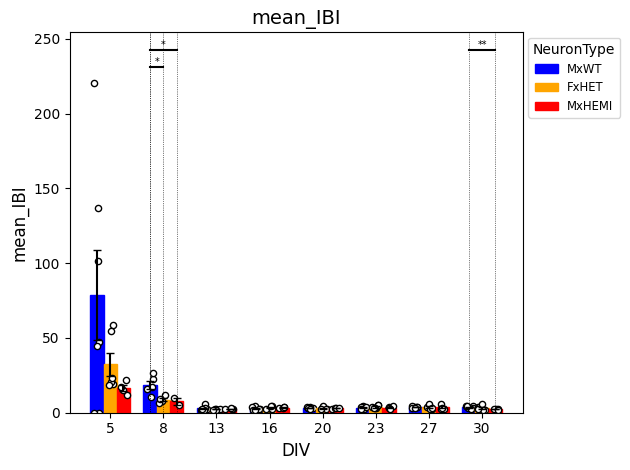

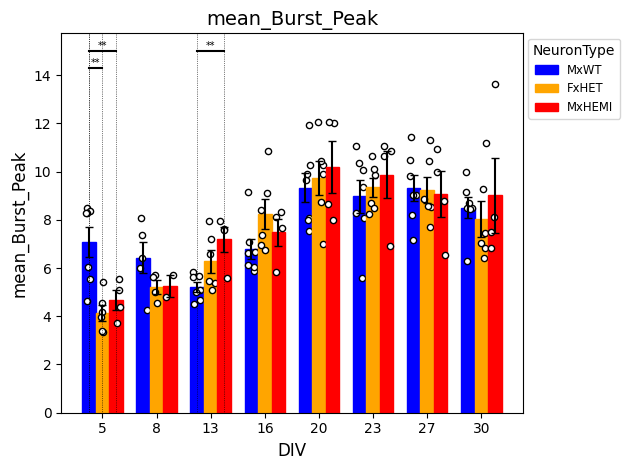

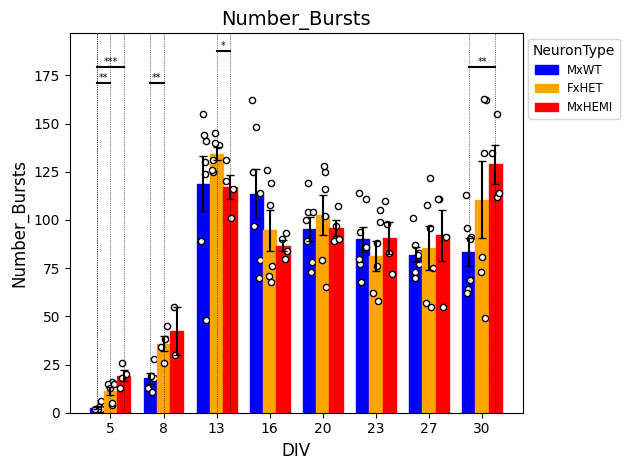

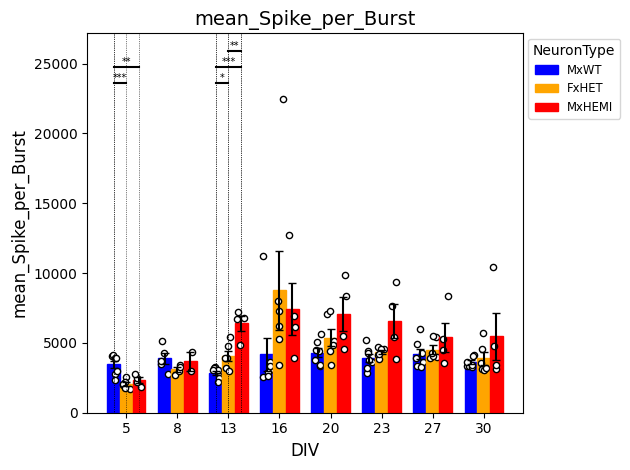

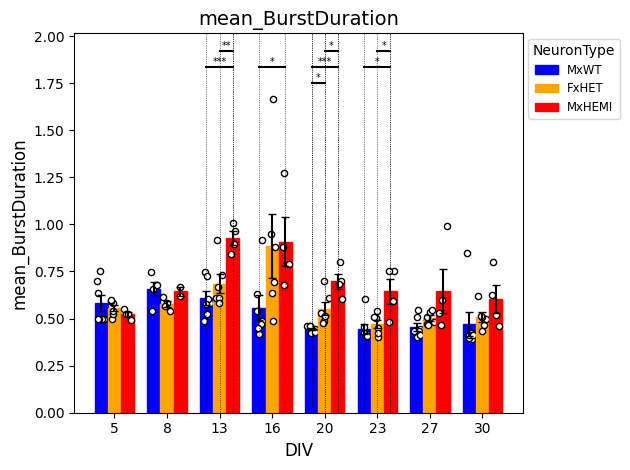

In [13]:
output_types = ['mean_IBI'
    , 'mean_Burst_Peak',  'Number_Bursts',
       'mean_Spike_per_Burst',
     'mean_BurstDuration']



unique_genotypes = [ 'MxWT', 'FxHET' ,'MxHEMI']

dirpath = '/mnt/disk15tb/paula/Main_DA_Projects/data_analysis_output/Primary Neurons/CDKL5_E6T1_Apr29/plots/'
for output_type in output_types:
    total_genotypes = len(unique_genotypes)
    #output_type='Number_Bursts'
    # Print the number of unique genotypes
    print(f"Number of unique Genotypes: {total_genotypes}")

    # Initialize output arrays for each unique genotype
    output_arrays = {genotype: [] for genotype in unique_genotypes}
    chip_arrays = {genotype: [] for genotype in unique_genotypes}
    well_arrays = {genotype: [] for genotype in unique_genotypes}
    print(unique_genotypes)
    # Fill data from data frame
    for i in div:
        for genotype in unique_genotypes:
            temp_df = df.loc[(df['DIV'] == i) &
                            (df['NeuronType'].str.strip() == genotype)
                            ]
            output_arrays[genotype].append(np.array(temp_df[output_type]))
            chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
            well_arrays[genotype].append(np.array(temp_df['Well']))
    #print(df)
    # Adjust bar width and gap between them
    bar_width = 0.25  # Adjust as necessary for your specific plot
    gap_between_bars = 0  # Adjust the gap between bars within a group

    # Calculate the total width for all bars in a group
    total_bar_group_width = total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars

    # Create x-coordinates of bars for each genotype group
    x_genotype = {genotype: [] for genotype in unique_genotypes}
    base_x_coordinate = np.arange(len(div))  # Base x-coordinates for each group
    offset = (total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars) / 2
    centered_x = base_x_coordinate - offset + bar_width / 2
    for i, genotype in enumerate(unique_genotypes):
        x_genotype[genotype] = centered_x + i * (bar_width + gap_between_bars)



    # Initialize plot
    fig, ax = plt.subplots()
    # Generate a list of distinct colors based on the number of genotypes
    #colors = [plt.colormaps['Set1'](i) for i in np.linspace(0, 1, len(unique_genotypes))]# Using a colormap to generate colors
    #colors2 = [plt.colormaps['Set2'](i) for i in np.linspace(0, 1, len(unique_genotypes))]#
    # marker_shapes = ['^', 's', 'v', 'D', '+', 'x', '*', 'H', '8']
    # marker_chips={chip:marker_shapes[idx] for idx, chip in enumerate(track_chips)}
    # Plot data for each genotype
    mean_data_all ={}
    yerr_data_all = {}
    n_data_all={}
    #breakpoint()
    #pdb.set_trace()
    for i,genotype in enumerate(unique_genotypes):
        #breakpoint()
        y_data = output_arrays[genotype]
        chipy_data = chip_arrays[genotype]
        welly_data = well_arrays[genotype]
        #print("type: ",type(genotype))
        # Calculate statistics
        mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
        yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_data]
        n_data = [len(yi) for yi in y_data]
        # Store statistics in dictionaries
        mean_data_all[genotype] = mean_data
        yerr_data_all[genotype] = yerr_data
        n_data_all[genotype] = n_data
        
            
        # Plot bars
        #transparency value 
        alpha_value = 0.5
        ax.bar(x_genotype[genotype], mean_data, yerr=yerr_data, capsize=3, width=bar_width, color=colors[i], edgecolor=colors[i], ecolor='black', label=genotype,alpha=1.0)

        #pdb.set_trace()
        # Plot scatter points
        #breakpoint()
        for j in range(len(x_genotype[genotype])):
            #pdb.set_trace()
            # ax.scatter(x_genotype[genotype][j] + np.zeros(y_data[j].size), y_data[j], s=20,color=colors2[i],marker=marker_chips[chipy_data[j]+str(welly_data[j])] if chipy_data[j]+str(welly_data[j]) in track_chips else 'o')
    # Concatenate corresponding elements from chipy_data[j] and welly_data[j]
            combined_data = [str(chip)+ str(well) for chip, well in zip(chipy_data[j], welly_data[j])]

            # # Check if the concatenated string is in track_chips, and set the marker accordingly
            # markers = [marker_chips.get(chipwell, 'o') for chipwell in combined_data]
            # #marker_chips[combined_data[0]] if combined_data[0] in track_chips else 'o'

            # Use the marker in the scatter plot
            jitter_amount=0.08
            for k in range(len(y_data[j])):
                #pdb.set_trace()
                ax.scatter(
                    x_genotype[genotype][j] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                    y_data[j][k],
                    s=20,
                    color='white',
                    marker='o',
                    edgecolors='black'
                        )


    # # Calculate maximum y-value for plotting significance
    # max_y = max([max(data) for data in output_arrays.values() if data.size > 0])
    # increment = max_y * 0.1  # Increment to adjust y-position for significance markers

    #Perform and plot t-tests between all pairs of genotype
    #pdb.set_trace()
    for i in range(len(base_x_coordinate)):
        #maxim = max([max( output_arrays[genotype][i] )for genotype in unique_genotypes])
        maxim = max(max(array) for genotype_arrays in output_arrays.values() for array in genotype_arrays)
        count = 1
        p_values = []
        for j, genotype1 in enumerate(unique_genotypes):
            for k, genotype2 in enumerate(unique_genotypes):
                if j < k:
                    #pdb.set_trace()
                    #print("mean_data_all",mean_data_all[genotype1])
                    #print("type:",type(genotype1))
                    mean1, sem1, n1 = mean_data_all[genotype1][i], yerr_data_all[genotype1][i], n_data_all[genotype1][i]
                    mean2, sem2, n2 = mean_data_all[genotype2][i], yerr_data_all[genotype2][i], n_data_all[genotype2][i]
                    #t_stat, p_value = stats.ttest_ind_from_stats(mean1, sem1, n1, mean2, sem2, n2)
                    sed = sqrt(sem1**2.0 + sem2**2.0)
                    t_stat = (mean1 - mean2) / sed
                    # degrees of freedom
                    degreef = n1+n2 - 2
                    alpha=0.05
                    # calculate the critical value
                    cv = stats.t.ppf(1.0 - alpha, degreef)
                    # calculate the p-vallue
                    p_value = (1.0 - stats.t.cdf(abs(t_stat), degreef)) * 2.0
                    p_values.append([mean1,sem1,mean2,sem2,p_value])

                    # Plot significance
                    #maxim = max(np.max(output_arrays[genotype1][i]), np.max(output_arrays[genotype2][i]))
                    x1, x2 = x_genotype[genotype1][i], x_genotype[genotype2][i]
                    
                    sign = "***" if p_value <= 0.001 else "**" if p_value <= 0.01 else "*" if p_value <= 0.05 else "ns"
                    if not sign =='ns':
                        ax.plot([x1, x2], [maxim + 0.05*maxim*(count)] * 2, 'k', linewidth=1.5)
                        ax.text((x1 + x2) / 2, maxim +0.05*maxim*(count), sign, ha='center', va='bottom', fontsize=7)
                        ax.axvline(x1,color='black',linestyle=':',linewidth=0.5)
                        ax.axvline(x2,color='black',linestyle=':',linewidth=0.5)
                    count = count +1

                    


   # Adjustments for plot aesthetics
    plt.title(f"{output_type}", fontsize=14)
    plt.xlabel('DIV', fontsize=12)
    plt.ylabel(f"{output_type}", fontsize=12)
    plt.xticks(base_x_coordinate, div, fontsize=10)
    plt.legend(title='NeuronType', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
    #plt.legend(title='NeuronType',loc='upper right', fontsize='x-small', handlelength=2, handletextpad=2, handleheight=2,bbox_to_anchor=(1.0, 1))
    import os 
    
    if not os.path.exists(dirpath):
            os.makedirs(dirpath)
    plt.savefig(f"{dirpath}/{output_type}.svg",dpi=300,format='svg')

In [9]:
from matplotlib.backends.backend_pdf import PdfPages

# Create a PDF file to save all the plots
with PdfPages(f"{dirpath}/all_plots.pdf") as pdf:
    for output_type in output_types:
        total_genotypes = len(unique_genotypes)
        
        # Print the number of unique genotypes
        print(f"Number of unique Genotypes: {total_genotypes}")

        # Initialize output arrays for each unique genotype
        output_arrays = {genotype: [] for genotype in unique_genotypes}
        chip_arrays = {genotype: [] for genotype in unique_genotypes}
        well_arrays = {genotype: [] for genotype in unique_genotypes}
        print(unique_genotypes)
        
        # Fill data from data frame
        for i in div:
            for genotype in unique_genotypes:
                temp_df = df.loc[(df['DIV'] == i) & (df['NeuronType'].str.strip() == genotype)]
                output_arrays[genotype].append(np.array(temp_df[output_type]))
                chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
                well_arrays[genotype].append(np.array(temp_df['Well']))
        
        # Adjust bar width and gap between them
        bar_width = 0.25  # Adjust as necessary for your specific plot
        gap_between_bars = 0  # Adjust the gap between bars within a group

        # Calculate the total width for all bars in a group
        total_bar_group_width = total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars

        # Create x-coordinates of bars for each genotype group
        x_genotype = {genotype: [] for genotype in unique_genotypes}
        base_x_coordinate = np.arange(len(div))  # Base x-coordinates for each group
        offset = (total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars) / 2
        centered_x = base_x_coordinate - offset + bar_width / 2
        for i, genotype in enumerate(unique_genotypes):
            x_genotype[genotype] = centered_x + i * (bar_width + gap_between_bars)

        # Initialize plot
        fig, ax = plt.subplots(figsize=(8, 6))

        mean_data_all = {}
        yerr_data_all = {}
        n_data_all = {}

        for i, genotype in enumerate(unique_genotypes):
            y_data = output_arrays[genotype]
            chipy_data = chip_arrays[genotype]
            welly_data = well_arrays[genotype]

            # Calculate statistics
            mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
            yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_data]
            n_data = [len(yi) for yi in y_data]

            # Store statistics in dictionaries
            mean_data_all[genotype] = mean_data
            yerr_data_all[genotype] = yerr_data
            n_data_all[genotype] = n_data

            # Plot bars
            ax.bar(x_genotype[genotype], mean_data, yerr=yerr_data, capsize=3, width=bar_width, color=colors[i], edgecolor='black', ecolor='black', label=genotype, alpha=0.6)

            # Plot scatter points
            for j in range(len(x_genotype[genotype])):
                combined_data = [str(chip)+str(well) for chip, well in zip(chipy_data[j], welly_data[j])]
                jitter_amount = 0.07
                for k in range(len(y_data[j])):
                    ax.scatter(
                        x_genotype[genotype][j] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                        y_data[j][k],
                        s=10,
                        color=colors[i],
                        marker='o'
                    )
        #Perform and plot t-tests between all pairs of genotype
    #pdb.set_trace()
        for i in range(len(base_x_coordinate)):
            #maxim = max([max( output_arrays[genotype][i] )for genotype in unique_genotypes])
            maxim = max(max(array) for genotype_arrays in output_arrays.values() for array in genotype_arrays)
            count = 1
            p_values = []
            for j, genotype1 in enumerate(unique_genotypes):
                for k, genotype2 in enumerate(unique_genotypes):
                    if j < k:
                        #pdb.set_trace()
                        #print("mean_data_all",mean_data_all[genotype1])
                        #print("type:",type(genotype1))
                        mean1, sem1, n1 = mean_data_all[genotype1][i], yerr_data_all[genotype1][i], n_data_all[genotype1][i]
                        mean2, sem2, n2 = mean_data_all[genotype2][i], yerr_data_all[genotype2][i], n_data_all[genotype2][i]
                        #t_stat, p_value = stats.ttest_ind_from_stats(mean1, sem1, n1, mean2, sem2, n2)
                        sed = sqrt(sem1**2.0 + sem2**2.0)
                        t_stat = (mean1 - mean2) / sed
                        # degrees of freedom
                        degreef = n1+n2 - 2
                        alpha=0.05
                        # calculate the critical value
                        cv = stats.t.ppf(1.0 - alpha, degreef)
                        # calculate the p-vallue
                        p_value = (1.0 - stats.t.cdf(abs(t_stat), degreef)) * 2.0
                        p_values.append([mean1,sem1,mean2,sem2,p_value])

                        # Plot significance
                        #maxim = max(np.max(output_arrays[genotype1][i]), np.max(output_arrays[genotype2][i]))
                        x1, x2 = x_genotype[genotype1][i], x_genotype[genotype2][i]
                        
                        sign = "***" if p_value <= 0.001 else "**" if p_value <= 0.01 else "*" if p_value <= 0.05 else "ns"
                        if not sign =='ns':
                            ax.plot([x1, x2], [maxim + 0.05*maxim*(count)] * 2, 'k', linewidth=1.5)
                            ax.text((x1 + x2) / 2, maxim +0.05*maxim*(count), sign, ha='center', va='bottom', fontsize=7)
                            ax.axvline(x1,color='black',linestyle=':',linewidth=0.5)
                            ax.axvline(x2,color='black',linestyle=':',linewidth=0.5)
                        count = count +1

                    
        # Adjustments for plot aesthetics
        plt.title(f"{output_type}", fontsize=14)
        plt.xlabel('DIV', fontsize=12)
        plt.ylabel(f"{output_type}", fontsize=12)
        plt.xticks(base_x_coordinate, div, fontsize=10)
        plt.legend(title='NeuronType', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
        plt.tight_layout()  # Adjust layout to prevent clipping of ylabel

        # Save the current figure to the PDF
        pdf.savefig(fig)
        plt.close(fig)

print("All plots have been saved to a single PDF file.")

Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
All plots have been saved to a single PDF file.
